# Importing Libraries


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset

In [14]:
df = pd.read_csv(r"/content/hotel_booking.csv")

# Exploratory Data analysis and Data cleaning

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [15]:
df.shape

(119390, 36)

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [16]:
df.drop(['name','email','phone-number','credit_card'],axis = 1,inplace = True)

In [7]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                 float64
arrival_date_month                 object
arrival_date_week_number          float64
arrival_date_day_of_month         float64
stays_in_weekend_nights           float64
stays_in_week_nights              float64
adults                            float64
children                          float64
babies                            float64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                 float64
previous_cancellations            float64
previous_bookings_not_canceled    float64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                   float64
deposit_type                       object
agent                             

In [48]:
 df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [11]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [34]:
for i in df:
  print(i)
  print(df[i].unique())

hotel
['Resort Hotel' 'City Hotel']
is_canceled
[0 1]
lead_time
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99  95  96  69  45  40  15  36  43  70  16 107  47 113  90
  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364 324
  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8 100
  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112  65
  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108 106
  31  87  41 304 117  59  53  58 116  42 321  38 118  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235 194

In [32]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [18]:
df.drop(['agent','company'],axis =1,inplace = True)

In [19]:
df.dropna(inplace = True)

In [33]:
df.shape

(118898, 30)

In [36]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [39]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,53823.000000,53823.000000,53823.000000,53823.000000,53823.000000,53823.000000,53823.000000,53823.0,53823.0,53823.0,53823.0,53823.0,53823.0,53823.0,53823.0,53823.000000,53823.0,53823.000000
mean,0.397005,98.039463,2016.197239,26.530517,15.679319,0.924456,2.404493,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.768363,0.0,0.535385
std,0.489282,87.853713,0.694769,13.434672,8.873480,0.875821,1.410404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.457558,0.0,0.684236
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.500000,0.0,0.000000
25%,0.000000,26.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.800000,0.0,0.000000
50%,0.000000,73.000000,2016.000000,26.000000,16.000000,1.000000,2.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.500000,0.0,0.000000
75%,1.000000,151.000000,2017.000000,38.000000,24.000000,2.000000,3.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.120000,0.0,1.000000
max,1.000000,373.000000,2017.000000,53.000000,31.000000,4.000000,6.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,189.200000,0.0,2.000000


In [20]:
for i in df:
  if df[i].dtypes != 'object':
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    ul = q3 + 1.5*iqr
    ll = q1 - 1.5 *iqr
    df = df[(df[i] >= ll) & (df[i] <= ul)]


# Data Analysis and Visualisations

In [43]:
df['is_canceled'].value_counts(normalize = True)

0    0.602995
1    0.397005
Name: is_canceled, dtype: float64

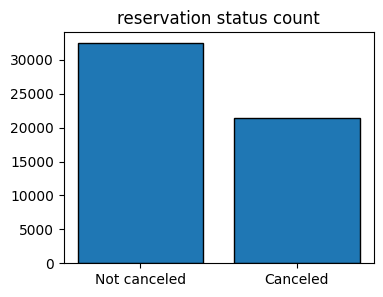

In [53]:
plt.figure(figsize = (4,3))
plt.title('reservation status count')
plt.bar(['Not canceled','Canceled'],df['is_canceled'].value_counts(),edgecolor = 'k')
plt.show()

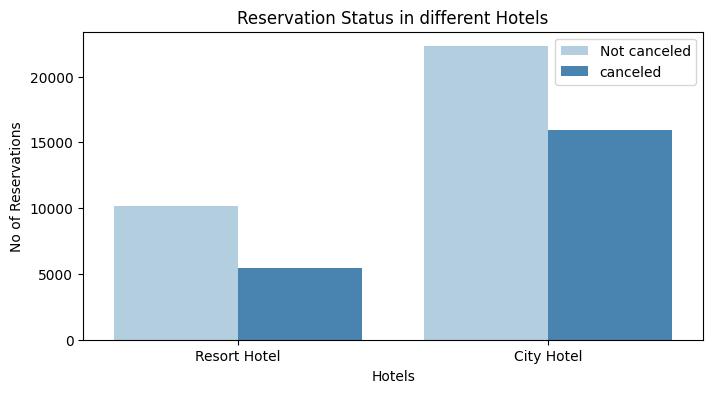

In [71]:
plt.figure(figsize = (8,4))
sns.countplot(x = 'hotel',hue = 'is_canceled',data = df,palette = 'Blues')
plt.title('Reservation Status in different Hotels')
plt.xlabel('Hotels')
plt.ylabel('No of Reservations')
plt.legend(['Not canceled','canceled'])



In [22]:
resort_hotel = df[df.hotel == 'Resort Hotel' ]
resort_hotel['is_canceled'].value_counts(normalize = True)

0    0.652417
1    0.347583
Name: is_canceled, dtype: float64

In [23]:
city_hotel = df[df.hotel == 'City Hotel' ]
city_hotel['is_canceled'].value_counts(normalize = True)

0    0.582863
1    0.417137
Name: is_canceled, dtype: float64

In [ ]:
resort_hotel = resort_hotel.groupby('reservation_status_date').mean()['adr']
city_hotel = city_hotel.groupby('reservation_status_date').mean()['adr']

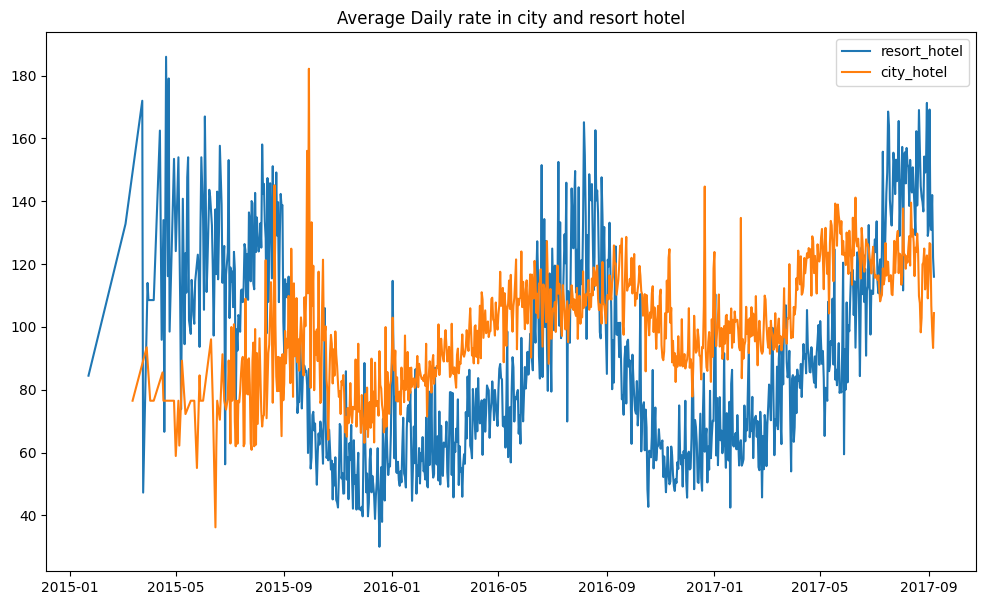

In [46]:
plt.figure(figsize = (12,7))
plt.title('Average Daily rate in city and resort hotel')
plt.plot(resort_hotel.index,resort_hotel.values,label = 'resort_hotel')
plt.plot(city_hotel.index,city_hotel.values,label = 'city_hotel')
plt.legend(fontsize =10 )
plt.show()

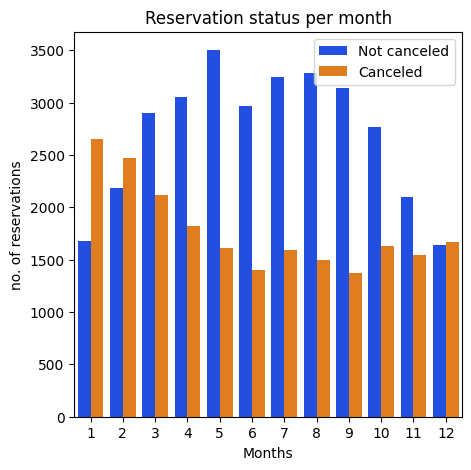

In [66]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize= (5,5))
sns.countplot(x =df['month'],hue = 'is_canceled',data = df, palette = 'bright' )
plt.title('Reservation status per month')
plt.xlabel('Months')
plt.ylabel('no. of reservations')
plt.legend(['Not canceled','Canceled'])

<Axes: xlabel='month', ylabel='adr'>

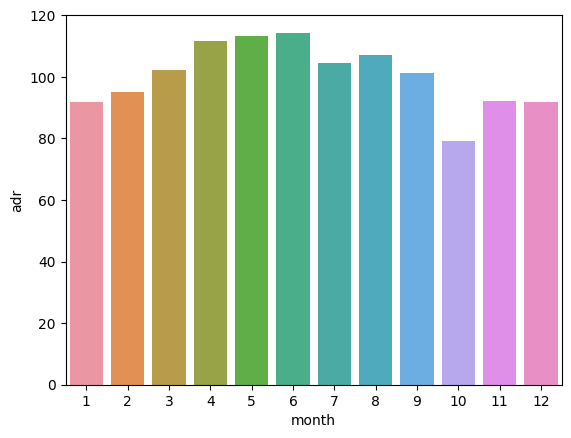

In [85]:
cancelled_months_data = df[df['is_canceled'] == 1].groupby('month')['adr'].mean().reset_index()
sns.barplot(x = 'month',y = 'adr',data = cancelled_months_data)

([<matplotlib.patches.Wedge at 0x7ef9d5a09300>,
 [Text(-0.46684252207954763, 0.9960211140223922, 'PRT'),
  Text(-0.4843803393367439, -0.9876111010230804, 'GBR'),
  Text(-0.027796360605802012, -1.099648744980447, 'FRA'),
  Text(0.38206918320675864, -1.031514972864534, 'ESP'),
  Text(0.6958139029450843, -0.8519642084432473, 'ITA'),
  Text(0.9012748325344602, -0.6306375157251438, 'DEU'),
  Text(1.0130879459208169, -0.428547329743099, 'IRL'),
  Text(1.0660611821390187, -0.27113383399413293, 'BRA'),
  Text(1.0907730810149499, -0.14217624883627386, 'BEL'),
  Text(1.099035937160392, -0.046043553620231825, 'CHN')],
 [Text(-0.25464137567975326, 0.5432842440122139, '64.0'),
  Text(-0.26420745782004207, -0.5386969641944074, '7.6'),
  Text(-0.015161651239528368, -0.5998084063529711, '6.1'),
  Text(0.20840137265823197, -0.5626445306533822, '6.0'),
  Text(0.3795348561518641, -0.464707750059953, '4.5'),
  Text(0.49160445410970544, -0.34398409948644204, '4.2'),
  Text(0.5525934250477181, -0.2337530889

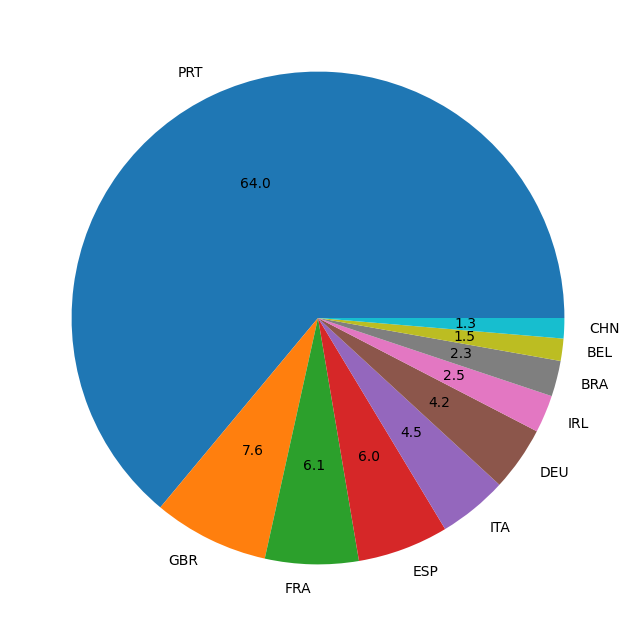

In [93]:
cancelled_data = df[df['is_canceled'] ==1]
top_10_countries = cancelled_data.country.value_counts()[:10]
plt.figure(figsize = (8,8))
plt.pie(top_10_countries,autopct = '%.1f',labels = top_10_countries.index)

In [96]:
df['market_segment'].value_counts(normalize = True)

Online TA        0.535570
Offline TA/TO    0.218680
Groups           0.156643
Direct           0.077662
Corporate        0.011222
Complementary    0.000204
Aviation         0.000019
Name: market_segment, dtype: float64

In [97]:
cancelled_data['market_segment'].value_counts(normalize = True)

Online TA        0.535708
Groups           0.253136
Offline TA/TO    0.166089
Direct           0.036456
Corporate        0.008564
Complementary    0.000047
Name: market_segment, dtype: float64

In [98]:
not_cancelled = df[df['is_canceled'] ==0]

In [103]:
cancel = cancelled_data.groupby('reservation_status_date')['adr'].mean().reset_index()
cancel.sort_values('reservation_status_date',inplace = True)

not_cancel = not_cancelled.groupby('reservation_status_date')['adr'].mean().reset_index()
not_cancel.sort_values('reservation_status_date',inplace = True)


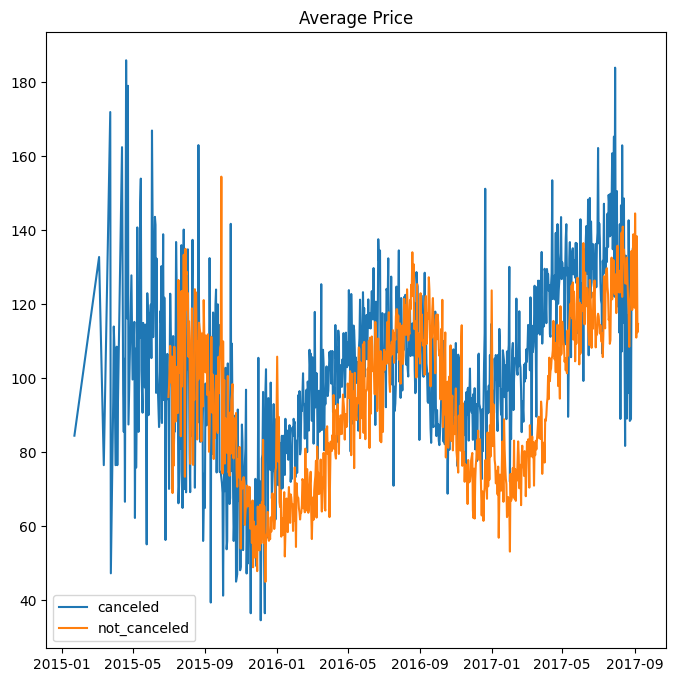

In [117]:
plt.figure(figsize = (8,8))
plt.title('Average Price')
plt.plot(cancel['reservation_status_date'],cancel['adr'])
plt.plot(not_cancel['reservation_status_date'],not_cancel['adr'])
plt.legend(['canceled','not_canceled'])